### Описание задания:
Проработать улучшение метрики RMSE, R2 модели линейной регрессии путем работы с данными, а именно проведения разведочного анализа данных. В качестве датасета необходимо загрузить данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR).

### Этапы работы:

1) Получите данные и загрузите их в рабочую среду.

2) Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.

3) Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

4) Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.

5) Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?

6) Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.
**a.** Сделайте выводы.
**b.** Удалите признаки на основании полученных значений, выводов.
**c.** Повторите п. 3, п. 4 на измененных данных.

7) Исследуйте оставленные признаки на выбросы.
**a.** Удалите выбросы в случае обнаружения.
**b.** Повторите п. 3, п. 4 на измененных данных.

8) Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.
**a.** Повторите п. 3, п. 4 на измененных данных.

9) Сформулируйте выводы по проделанной работе.
**a.** Кратко опишите какие преобразования были сделаны с данными.
**b.** Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.
**c.** Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from math import log, sqrt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
houses = fetch_california_housing()

In [4]:
data = pd.DataFrame(houses.data, columns=houses.feature_names)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
target = pd.DataFrame(houses.target, columns=houses.target_names)
target.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [6]:
data = pd.concat([data, target], axis=1)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
data.duplicated().sum()

0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [10]:
X = data[data.columns[:-1]]
y = data['MedHouseVal']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
print(f'score на обучающей множестве: {model.score(X_train, y_train)}')
print(f'score на тестовой множестве: {model.score(X_test, y_test)}')

score на обучающей множестве: 0.6085066783857864
score на тестовой множестве: 0.5971316271519003


### Вычисление метрик RMSE, R2 на обучающем и тестовом множестве

In [14]:
pred_train_values = model.predict(X_train)
pred_test_values = model.predict(X_test)

In [15]:
print(f'RMES на обучающей множестве: {sqrt(mean_squared_error(y_train, pred_train_values))}')
print(f'RMES на тестовой множестве: {sqrt(mean_squared_error(y_test, pred_test_values))}')
print(f'R2 на обучающей множестве: {r2_score(y_train, pred_train_values)}')
print(f'R2 на тестовом множестве: {r2_score(y_test, pred_test_values)}')

RMES на обучающей множестве: 0.7211329202116264
RMES на тестовой множестве: 0.7359423229464879
R2 на обучающей множестве: 0.6085066783857864
R2 на тестовом множестве: 0.5971316271519003


### График распределения целевой переменной

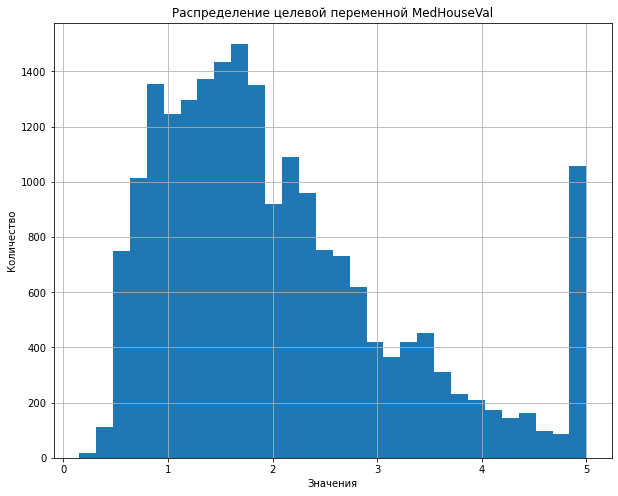

In [16]:
plt.figure(figsize=[10,8])
data['MedHouseVal'].hist(bins=30)
plt.title('Распределение целевой переменной MedHouseVal')
plt.xlabel('Значения')
plt.ylabel('Количество')
plt.show()

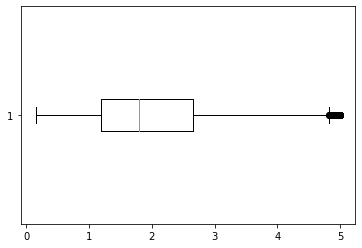

In [17]:
plt.boxplot(data['MedHouseVal'], vert=False)
None

Вывод: по гистограмме мы наблюдаем, что целевая переменная имеет распределение отличное от нормального при этом с положительно скошенным распределением.

### Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.

<AxesSubplot:>

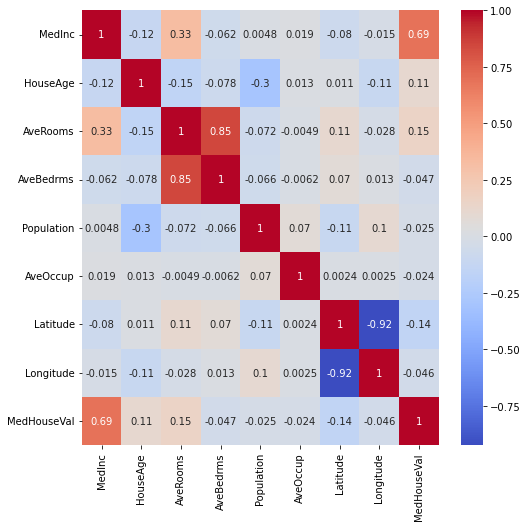

In [18]:
plt.figure(figsize=[8,8])
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)

In [19]:
data.corr()[['MedHouseVal']].sort_values(by='MedHouseVal', ascending = False)

,MedHouseVal
MedHouseVal,1.000000
MedInc,0.688075
AveRooms,0.151948
HouseAge,0.105623
AveOccup,-0.023737
Population,-0.024650
Longitude,-0.045967
AveBedrms,-0.046701
Latitude,-0.144160


Вывод: на основе данных о корреляции мы видим, что на модель имеют минимальное воздействие AveOccup и Population. Также мы видим большую корреляцию у пар AveRooms-AveBedrms и Longitude-Latitude

In [20]:
new_data = data.drop(columns=['AveOccup', 'Population'])

X = new_data[new_data.columns[:-1]]
y = new_data['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

new_model = LinearRegression()
new_model.fit(X_train, y_train)

new_pred_train_values = new_model.predict(X_train)
new_pred_test_values = new_model.predict(X_test)

print(f'RMES на обучающей множестве: {sqrt(mean_squared_error(y_train, new_pred_train_values))}')
print(f'RMES на тестовой множестве: {sqrt(mean_squared_error(y_test, new_pred_test_values))}')
print(f'R2 на обучающей множестве: {r2_score(y_train, new_pred_train_values)}')
print(f'R2 на тестовом множестве: {r2_score(y_test, new_pred_test_values)}')

RMES на обучающей множестве: 0.7222666747702413
RMES на тестовой множестве: 0.7368376742683643
R2 на обучающей множестве: 0.6072747106345358
R2 на тестовом множестве: 0.5961507672692916


Вывод: удаление признаков AveOccup и Population уменьшило RMES и R2 на совсем небольшое значение, но сократил количество признаков на 2. Удаление других признаков приводит к заметному увеличению значения ошибок

### Исследование оставленные признаки на выбросы.

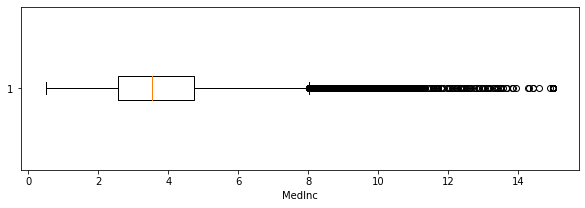

In [21]:
plt.figure(figsize=[10,3])
plt.boxplot(data['MedInc'], vert=False)
plt.xlabel('MedInc')
None

In [22]:
data_new = data[data['MedInc'] < 13]

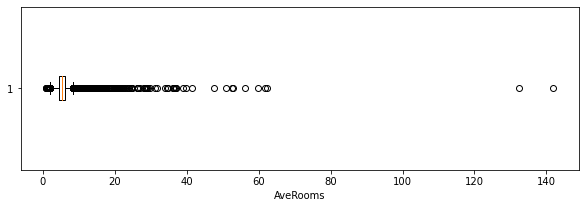

In [23]:
plt.figure(figsize=[10,3])
plt.boxplot(data['AveRooms'], vert=False)
plt.xlabel('AveRooms')
None

In [24]:
data_new = data[data['AveRooms'] < 40]

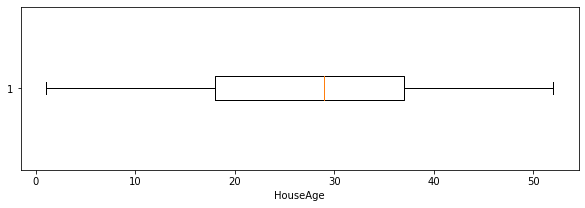

In [25]:
plt.figure(figsize=[10,3])
plt.boxplot(data['HouseAge'], vert=False)
plt.xlabel('HouseAge')
None

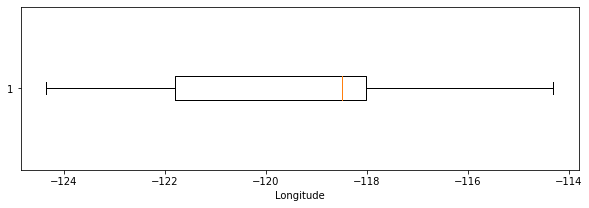

In [26]:
plt.figure(figsize=[10,3])
plt.boxplot(data['Longitude'], vert=False)
plt.xlabel('Longitude')
None

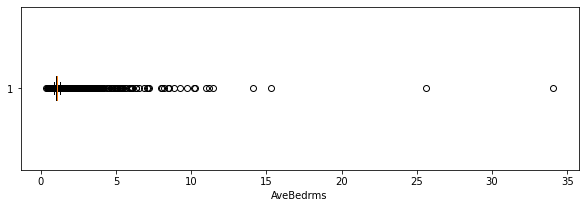

In [27]:
plt.figure(figsize=[10,3])
plt.boxplot(data['AveBedrms'], vert=False)
plt.xlabel('AveBedrms')
None

In [28]:
data_new = data[data['AveBedrms'] < 7]

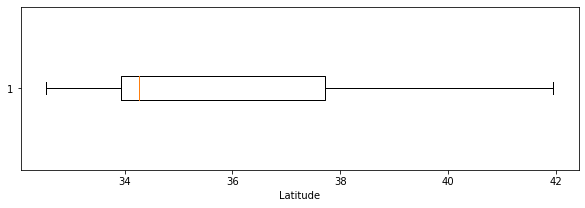

In [29]:
plt.figure(figsize=[10,3])
plt.boxplot(data['Latitude'], vert=False)
plt.xlabel('Latitude')
None

In [30]:
X = data_new[data_new.columns[:-1]]
y = data_new['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

new_model = LinearRegression()
new_model.fit(X_train, y_train)

new_pred_train_values = new_model.predict(X_train)
new_pred_test_values = new_model.predict(X_test)

print(f'RMES на обучающей множестве: {sqrt(mean_squared_error(y_train, new_pred_train_values))}')
print(f'RMES на тестовой множестве: {sqrt(mean_squared_error(y_test, new_pred_test_values))}')
print(f'R2 на обучающей множестве: {r2_score(y_train, new_pred_train_values)}')
print(f'R2 на тестовом множестве: {r2_score(y_test, new_pred_test_values)}')

RMES на обучающей множестве: 0.7192879325888751
RMES на тестовой множестве: 0.7196572863465958
R2 на обучающей множестве: 0.6112846776151399
R2 на тестовом множестве: 0.611659627867958


### Изменю несколько признаков на выбор математически, вычислив логарифм

In [32]:
data_new['AveRooms'] = data_new['AveRooms'].apply(lambda x: log(x))

C:\Users\User\AppData\Local\Temp/ipykernel_16092/220247560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['AveRooms'] = data_new['AveRooms'].apply(lambda x: log(x))


In [33]:
X = data_new[data_new.columns[:-1]]
y = data_new['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

new_model = LinearRegression()
new_model.fit(X_train, y_train)

new_pred_train_values = new_model.predict(X_train)
new_pred_test_values = new_model.predict(X_test)

print(f'RMES на обучающей множестве: {sqrt(mean_squared_error(y_train, new_pred_train_values))}')
print(f'RMES на тестовой множестве: {sqrt(mean_squared_error(y_test, new_pred_test_values))}')
print(f'R2 на обучающей множестве: {r2_score(y_train, new_pred_train_values)}')
print(f'R2 на тестовом множестве: {r2_score(y_test, new_pred_test_values)}')

RMES на обучающей множестве: 0.7196088114715817
RMES на тестовой множестве: 0.7190496855105779
R2 на обучающей множестве: 0.6109377835433081
R2 на тестовом множестве: 0.612315096328839


### Выводы по проекту:

Были произведены следующие преобразования:

- были исключены из датасета признаки с низкой корреляцией с целевой переменной

- были исключены выбросы

- был прологарифмирован признак AveRooms

Модель показала следующие метрики RMSE и r2_score на тестовых данных

- rmse 0.7359 - r2 0.5971: до преобразований по всем признакам

- rmse 0.7368 - r2 0.5961: после исключения части признаков

- rmse 0.7196 - r2 0.6116: после исключения выбросов

- rmse 0.7190 - r2 0.6123: после логарифмирования AveRooms

Удалось немного улучшить показатели rmse и r2.

Модель вместо того, чтобы улучшить свои результаты после исключения из неё несущественных признаков, уменьшила свои результаты. В экспериментах падение результатов происходило при исключении любого из признаков. Это можно объяснить малым количеством признаком и большой корреляцией целевой переменной с MedInc.